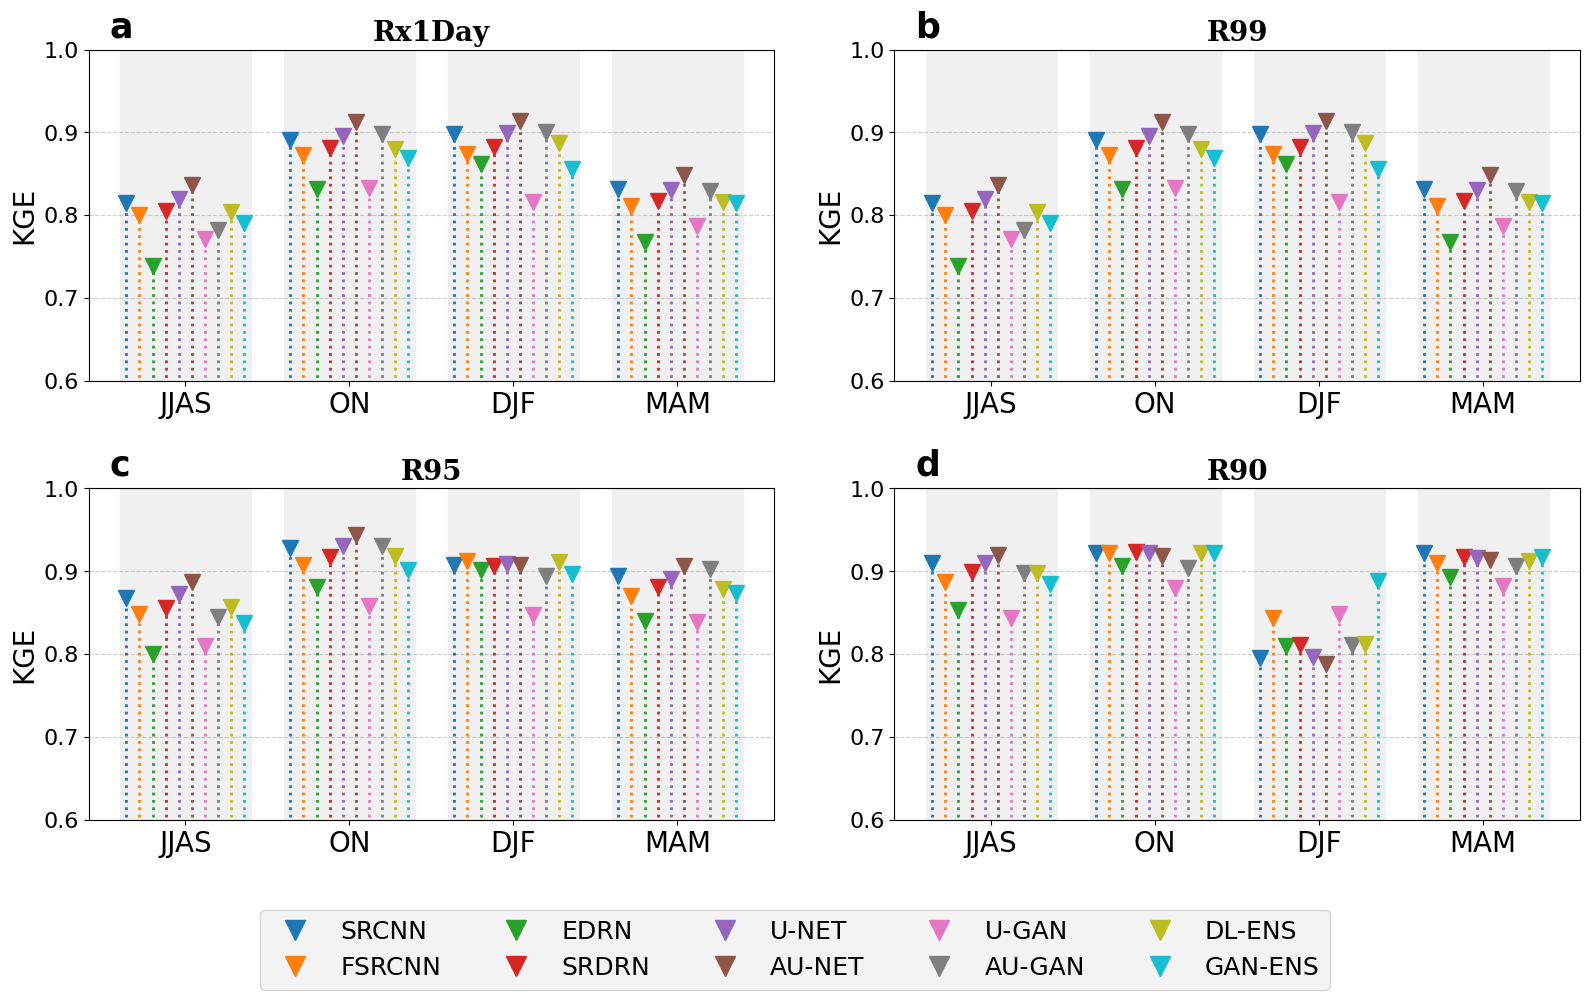

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM06_ExtremeIndices_Seasonal"

files = [
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.RX1DAY.e01.det00.csv', 'Rx1Day'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R99.e01.det00.csv', 'R99'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R95.e01.det00.csv', 'R95'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R90.e01.det00.csv', 'R90')
]

seasons_order = ['JJAS', 'ON', 'DJF', 'MAM']
metric_to_plot = 'KGE'

dfs = {}
for f, label in files:
    df = pd.read_csv(f)
    df_seamask = df[(df['ZONE_NAME'] == 'SEA MASK') & (df['SEASON'].isin(seasons_order))].copy()
    df_seamask['SEASON'] = pd.Categorical(df_seamask['SEASON'], categories=seasons_order, ordered=True)
    df_seamask = df_seamask.sort_values(['SEASON', 'EXP_ID'])
    dfs[label] = df_seamask

subplot_labels = ['a', 'b', 'c', 'd']

all_models = ['SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-NET', 'AU-NET', 'U-GAN', 'AU-GAN', 'DL-ENS', 'GAN-ENS']

n_models = len(all_models)
n_seasons = len(seasons_order)

colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf'   # cyan
]


model_colors = {model: colors[i] for i, model in enumerate(all_models)}

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
axes = axes.flatten()

bar_width = 0.8 / n_models  # width of each marker group per model
x = np.arange(n_seasons)

shade_color = '#f0f0f0'#'#fff9db'  # very light yellow
shade_alpha = 1

for ax, (label, df), sublabel in zip(axes, dfs.items(), subplot_labels):
    # Calculate full cluster width per season (total width of all models)
    cluster_width = n_models * bar_width

    ax.set_facecolor('white')  # Light grey
    
    # Shade background for each season cluster
    for i in range(n_seasons):
        # Center position of the season cluster is at 'i'
        start = i - cluster_width / 2
        end = i + cluster_width / 2
        ax.axvspan(start, end, color=shade_color, alpha=shade_alpha, zorder=0)
    
    # Plot stem plots for each model with shifted positions
    for i, model in enumerate(all_models):
        vals = []
        for season in seasons_order:
            val = df[(df['SEASON'] == season) & (df['EXP_ID'] == model)][metric_to_plot]
            vals.append(val.values[0] if not val.empty else np.nan)
        x_positions = x - cluster_width / 2 + i * bar_width + bar_width / 2
        markerline, stemlines, baseline = ax.stem(x_positions, vals, linefmt=':', markerfmt='v', basefmt=' ')
        plt.setp(markerline, color=model_colors[model], markersize=12)
        plt.setp(stemlines, color=model_colors[model], linewidth=2)
    
    ax.set_title(label, fontsize=20, fontweight='semibold', fontfamily='serif')
    ax.set_xticks(x)
    ax.tick_params(axis='both', labelsize=16)
    ax.set_xticklabels(seasons_order, fontsize=20, fontweight='normal')
    ax.set_ylabel('KGE', fontsize=20, fontweight='normal')
    ax.set_ylim(0.6, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
    
    ax.text(0.03, 1.12, sublabel, transform=ax.transAxes,
            fontsize=25, fontweight='bold', fontfamily='sans-serif', va='top')

axes[0].set_ylabel(metric_to_plot)
axes[2].set_ylabel(metric_to_plot)

legend_handles = [Line2D([0], [0], marker='v', color='w', label=model,
                         markerfacecolor=model_colors[model], markersize=15,
                         markeredgecolor=model_colors[model], linestyle='None') for model in all_models]

font_props = FontProperties(size=18)
fig.legend(legend_handles, all_models, loc='lower center', ncol=5, fontsize=18, prop=font_props, bbox_to_anchor=(0.5, -0.01), frameon=True, facecolor='#f0f0f0')


plt.tight_layout(rect=[0, 0.12, 1, 1], w_pad=3.0, h_pad=2.0)

# Show/Save the plot
save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure06.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()

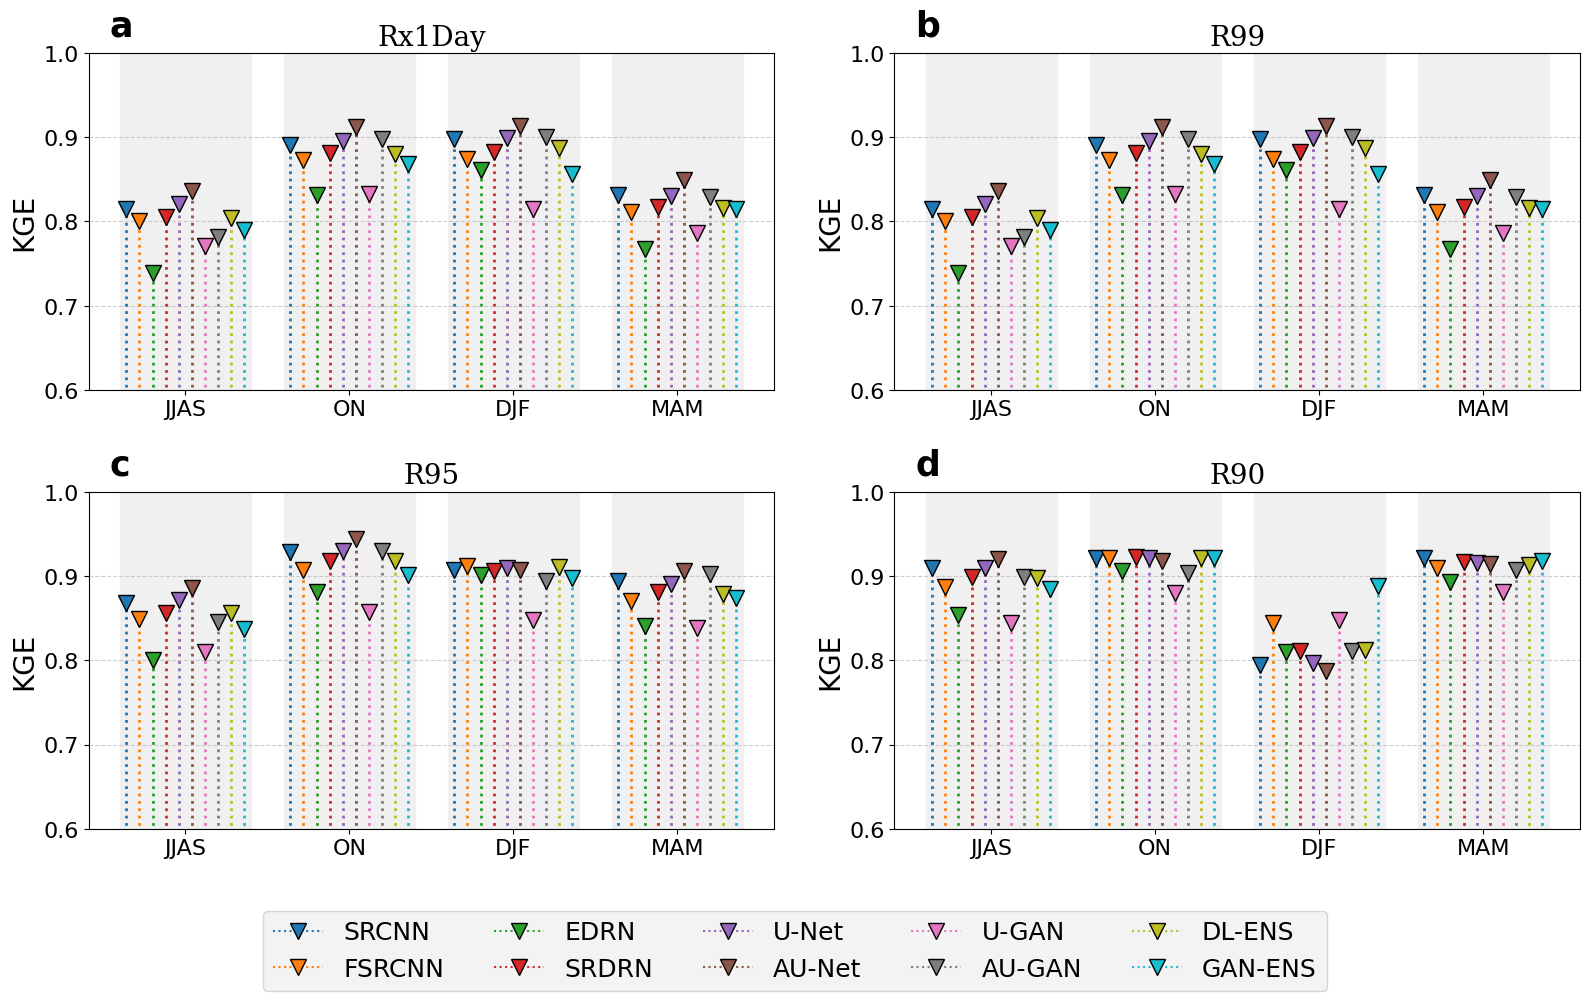

In [2]:
#!/usr/bin/env python
# ------------------------------------------------------------------
#  4-panel clustered stem-plot (KGE) with black marker outlines
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

DPATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM06_ExtremeIndices_Seasonal"

files = [
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.RX1DAY.e01.det00.csv', 'Rx1Day'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R99.e01.det00.csv', 'R99'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R95.e01.det00.csv', 'R95'),
    (f'{DPATH}/TABLE_EVALMETRICS_wSEASZONE_P02A.R90.e01.det00.csv', 'R90')
]

seasons_order  = ['JJAS', 'ON', 'DJF', 'MAM']
metric_to_plot = 'KGE'

# ------------------------------------------------------------------
#  Read data into a dict of DataFrames
# ------------------------------------------------------------------
dfs = {}
for f, label in files:
    df = pd.read_csv(f)
    sel = (df['ZONE_NAME'] == 'SEA MASK') & (df['SEASON'].isin(seasons_order))
    df = df[sel].copy()
    df['SEASON'] = pd.Categorical(df['SEASON'],
                                  categories=seasons_order, ordered=True)
    df = df.sort_values(['SEASON', 'EXP_ID'])
    dfs[label] = df

subplot_labels = ['a', 'b', 'c', 'd']
all_models     = [
    'SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-Net',
    'AU-Net', 'U-GAN', 'AU-GAN', 'DL-ENS', 'GAN-ENS'
]

colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
model_colors = dict(zip(all_models, colors))

# ------------------------------------------------------------------
#  Figure layout
# ------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
axes = axes.flatten()

bar_width   = 0.8 / len(all_models)
cluster_w   = len(all_models) * bar_width
shade_color = '#f0f0f0'
shade_alpha = 1

for ax, (label, df), tag in zip(axes, dfs.items(), subplot_labels):

    x      = np.arange(len(seasons_order))
    ax.set_facecolor('white')

    # ---- background shading per season cluster -------------------
    for i in range(len(seasons_order)):
        start = i - cluster_w / 2
        end   = i + cluster_w / 2
        ax.axvspan(start, end, color=shade_color,
                   alpha=shade_alpha, zorder=0)

    # ---- stems per model -----------------------------------------
    for pos, model in enumerate(all_models):
        vals = [
            df[(df['SEASON'] == s) & (df['EXP_ID'] == model)][metric_to_plot]
            .values[0] if not
            df[(df['SEASON'] == s) & (df['EXP_ID'] == model)].empty else np.nan
            for s in seasons_order
        ]
        x_shift = x - cluster_w / 2 + pos * bar_width + bar_width / 2
        m, stems, _ = ax.stem(x_shift, vals,
                              linefmt=':', markerfmt='v', basefmt=' ')
        # >>> single line where we set both face & edge  <<<
        plt.setp(m, markersize=12, markerfacecolor=model_colors[model],
                 markeredgecolor='black', color=model_colors[model])
        plt.setp(stems, linewidth=2, color=model_colors[model])

    # cosmetics
    ax.set_title(label, fontsize=20, fontweight='normal', fontfamily='serif')
    ax.set_xticks(x)
    ax.set_xticklabels(seasons_order, fontsize=20)
    ax.set_ylabel('KGE', fontsize=20)
    ax.set_ylim(0.6, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='both', which='both', labelsize=16)
    ax.text(0.03, 1.05, tag, transform=ax.transAxes,
            fontsize=25, fontweight='bold')

# y-labels on left column
axes[0].set_ylabel(metric_to_plot)
axes[2].set_ylabel(metric_to_plot)

# ------------------------------------------------------------------
#  Legend with black edges
# ------------------------------------------------------------------
handles = [
    Line2D([0], [0], marker='v', linestyle=':', color=model_colors[m],
           markerfacecolor=model_colors[m], markeredgecolor='black',
           markersize=12, label=m)
    for m in all_models
]

fig.legend(handles, all_models, loc='lower center', ncol=5,
           fontsize=18, frameon=True, prop=FontProperties(size=18),
           bbox_to_anchor=(0.5, -0.01), facecolor='#f0f0f0')

plt.tight_layout(rect=[0, 0.12, 1, 1], w_pad=3.0, h_pad=2.0)

save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure06_SeasonalExtremeKGE.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()
